# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [112]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import random
import numpy as np
import seaborn as sns
import urllib
from urllib.error import HTTPError
from citipy import citipy
from random import uniform
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



## Generate Cities List

In [214]:
#Get only the cities inside this latitudes and longites

lat_range = (-90, 90)
lon_range = (-180, -180)

lat_lons = []
cities = []

#Get randomized lats and lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)
count_limit = 0

for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1])
    city = city.city_name
    
    #Unique city, add to cities list
    if city not in cities:
        #limiting to only 600 cities
        if count_limit < 600:
            #title capitalizes the cities
            cities.append(city.title())
            count_limit += 1
        else:
            break
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [215]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

In [216]:
api_key = "64c31beb856520cc86ae3221ce851cdd"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_data = []
city_count = 1

#loop through all cities with count enumerate
for city in cities:
    city_url = url + "&q=" + urllib.request.pathname2url(city)  
    print ("{}: City: {}".format(city_count, city))
    print (city_url)
    city_count += 1    
        #Running API request for each cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If error, skip the city
    except:
        pass
    

1: City: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Bredasdorp
2: City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Ushuaia
3: City: Ak-Dovurak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Ak-Dovurak
4: City: Kasangulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Kasangulu
5: City: Sungaipenuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Sungaipenuh
6: City: Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Belmonte
7: City: Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Bambous%20Virieux
8: City: Nizhneyansk
http://api.openweathermap.org/data/2.5/

64: City: Sao Pedro Do Sul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Sao%20Pedro%20Do%20Sul
65: City: Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Kapaa
66: City: Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Labuhan
67: City: Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Barrow
68: City: Lira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Lira
69: City: Sarankhola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Sarankhola
70: City: Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Albany
71: City: Road Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial

127: City: Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Albany
128: City: Abomsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Abomsa
129: City: Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Karratha
130: City: Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Longyearbyen
131: City: Pitiquito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Pitiquito
132: City: Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Tuktoyaktuk
133: City: Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Maniitsoq
134: City: Nantucket
http://api.openweathermap.org/data/2.5/weathe

189: City: Xifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Xifeng
190: City: Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Atuona
191: City: Port Hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Port%20Hawkesbury
192: City: Litovko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Litovko
193: City: Suifenhe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Suifenhe
194: City: Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Albany
195: City: Arraial Do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Arraial%20Do%20Cabo
196: City: Haines Junction
http://api.openweathermap.org

252: City: Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Port%20Alfred
253: City: New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=New%20Norfolk
254: City: Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Lebu
255: City: Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Saint%20Anthony
256: City: Jijiga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Jijiga
257: City: Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Hobart
258: City: Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Ostrovnoy
259: City: Severo-Kurilsk
http://api.openweathermap.org/data/2

313: City: Teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Teguldet
314: City: Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Ribeira%20Grande
315: City: Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Rikitea
316: City: Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Hasaki
317: City: Aleysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Aleysk
318: City: Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Samarai
319: City: Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Kodiak
320: City: Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Im

375: City: Ankang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Ankang
376: City: Casablanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Casablanca
377: City: Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Hermanus
378: City: Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Albany
379: City: Sao Felix Do Xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Sao%20Felix%20Do%20Xingu
380: City: Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Bluff
381: City: Hailar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Hailar
382: City: Rikitea
http://api.openweathermap.org/data/2.5/weathe

437: City: Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Tasiilaq
438: City: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Punta%20Arenas
439: City: Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Torbay
440: City: Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Touros
441: City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Ushuaia
442: City: Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Aykhal
443: City: Elizabeth City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Elizabeth%20City
444: City: Mahebourg
http://api.openweathermap.org/data/2.5/weathe

499: City: Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Chokurdakh
500: City: Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Lebu
501: City: Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Upernavik
502: City: Mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Mayumba
503: City: Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Tasiilaq
504: City: Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Hualmay
505: City: Jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Jalu
506: City: Taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6

562: City: Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Bilma
563: City: Viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Viligili
564: City: Palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Palabuhanratu
565: City: Hervey Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Hervey%20Bay
566: City: Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Rikitea
567: City: Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Mataura
568: City: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64c31beb856520cc86ae3221ce851cdd&q=Punta%20Arenas
569: City: Bambous Virieux
http://api.openweathermap.org/dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:
#Converting data to Pandas DataFrame
city_dataframe = pd.DataFrame(city_data)
city_dataframe
#Extracting fields from DF
lat = city_dataframe["Lat"]
max_temp = city_dataframe["Max Temp"]
humidity = city_dataframe["Humidity"]
cloudiness = city_dataframe["Cloudiness"]
wind_speed = city_dataframe["Wind Speed"]

city_dataframe.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [191]:
# Display the city dataframe
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,88,ZA,1554773481,92,-34.42,19.24,66.99,3.40
1,Vaini,20,IN,1554771600,94,15.34,74.49,69.80,1.36
2,Kavaratti,24,IN,1554773565,100,10.57,72.64,84.88,3.89
3,Port Alfred,88,ZA,1554773542,96,-33.59,26.89,63.00,3.56
4,Atuona,76,PF,1554773566,100,-9.80,-139.03,80.83,7.31


In [192]:
# Output results to csv file
city_dataframe.to_csv('cities.csv', sep='\t', encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

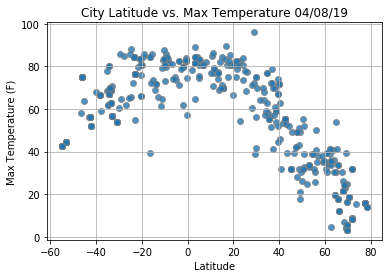

In [209]:
plt.scatter(lat, max_temp, edgecolor="grey", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Max Temperature {}".format(time.strftime("%x")))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latvstemp.png")

plt.show()

#### Latitude vs. Humidity Plot

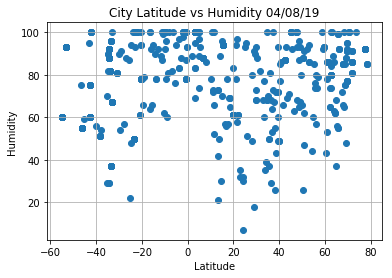

In [206]:
plt.scatter(lat, humidity)
plt.title("City Latitude vs Humidity {}".format(time.strftime("%x")))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latvshumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

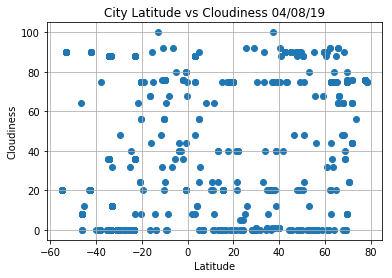

In [207]:
plt.scatter(lat, cloudiness)
plt.title("City Latitude vs Cloudiness {}".format(time.strftime("%x")))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latvscloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

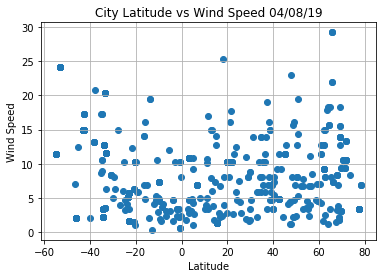

In [208]:
plt.scatter(lat, wind_speed)
plt.title("City Latitude vs Wind Speed {}".format(time.strftime("%x")))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latvswindspeed.png")

plt.show()